In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import sys
from pathlib import Path
ROOT_DIR = os.path.abspath(os.path.join(Path().absolute(), os.pardir))
sys.path.insert(1, ROOT_DIR)

In [6]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from frequency_response import FrequencyResponse
from biquad import peaking, low_shelf, high_shelf, digital_coeffs

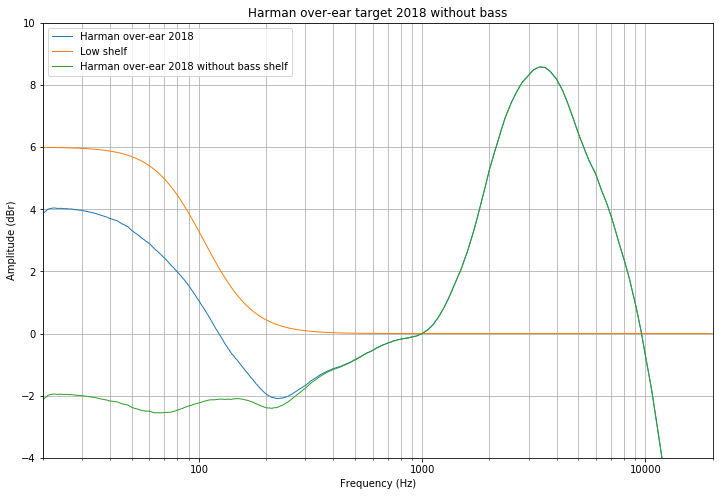

In [70]:
harman_overear = FrequencyResponse.read_from_csv(os.path.join(ROOT_DIR, 'compensation', 'harman_over-ear_2018.csv'))
fig, ax = harman_overear.plot_graph(show=False, color='C0')

fs = 48000
a0, a1, a2, b0, b1, b2 = low_shelf(105.0, 0.71, 6, fs=fs)
shelf = digital_coeffs(harman_overear.frequency, fs, a0, a1, a2, b0, b1, b2)
shelf = FrequencyResponse(name='Shelf', frequency=harman_overear.frequency.copy(), raw=shelf)
shelf.plot_graph(fig=fig, ax=ax, show=False, color='C1')

harman_overear_wo_bass = FrequencyResponse(
    name='Harman over-ear target 2018 without bass',
    frequency=harman_overear.frequency.copy(),
    raw=harman_overear.raw - shelf.raw
)
harman_overear_wo_bass.plot_graph(fig=fig, ax=ax, color='C2', show=False)
ax.legend(['Harman over-ear 2018', 'Low shelf', 'Harman over-ear 2018 without bass shelf'])
ax.set_ylim([-4, 10])
plt.show()

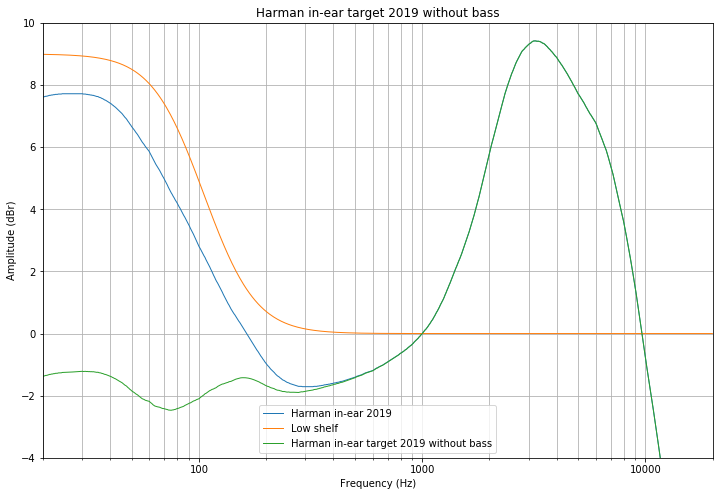

In [71]:
harman_inear = FrequencyResponse.read_from_csv(os.path.join(ROOT_DIR, 'compensation', 'harman_in-ear_2019v2.csv'))
fig, ax = harman_inear.plot_graph(show=False, color='C0')

fs = 48000
a0, a1, a2, b0, b1, b2 = low_shelf(105.0, 0.71, 9, fs=fs)
shelf = digital_coeffs(harman_inear.frequency, fs, a0, a1, a2, b0, b1, b2)
shelf = FrequencyResponse(name='Shelf', frequency=harman_inear.frequency.copy(), raw=shelf)
shelf.plot_graph(fig=fig, ax=ax, show=False, color='C1')

harman_inear_wo_bass = FrequencyResponse(
    name='Harman in-ear target 2019 without bass',
    frequency=harman_inear.frequency.copy(),
    raw=harman_inear.raw - shelf.raw
)
harman_inear_wo_bass.plot_graph(fig=fig, ax=ax, color='C2', show=False)
ax.legend(['Harman in-ear 2019', 'Low shelf', 'Harman in-ear target 2019 without bass'])
ax.set_ylim([-4, 10])
plt.show()

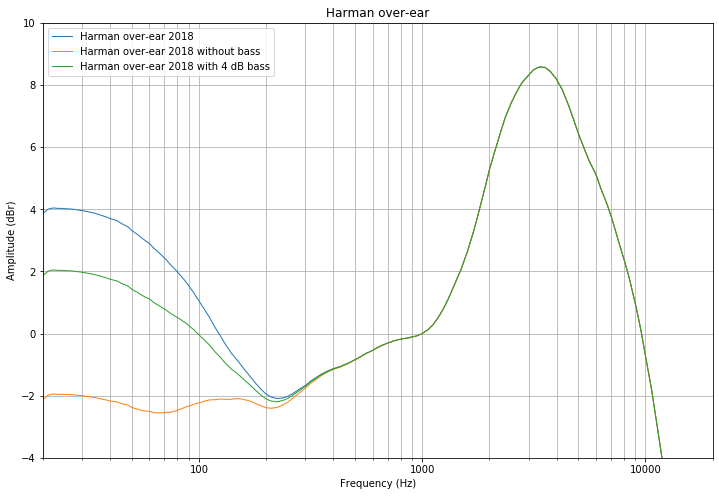

In [74]:
fig, ax = harman_overear.plot_graph(show=False, color='C0')
harman_overear_wo_bass.plot_graph(fig=fig, ax=ax, show=False, color='C1')
harman_overear_4_bass = harman_overear_wo_bass.copy()
harman_overear_4_bass.raw += digital_coeffs(harman_overear_4_bass.frequency, fs, *low_shelf(105, 0.71, 4, fs=fs))
harman_overear_4_bass.plot_graph(fig=fig, ax=ax, show=False, color='C2')
ax.legend(['Harman over-ear 2018', 'Harman over-ear 2018 without bass', 'Harman over-ear 2018 with 4 dB bass'])
ax.set_ylim([-4, 10])
ax.set_title('Harman over-ear')
plt.show()

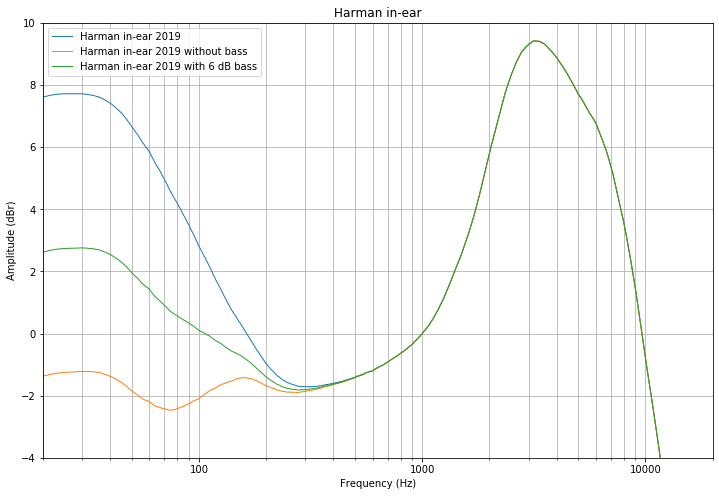

In [75]:
fig, ax = harman_inear.plot_graph(show=False, color='C0')
harman_inear_wo_bass.plot_graph(fig=fig, ax=ax, show=False, color='C1')
harman_inear_6_bass = harman_inear_wo_bass.copy()
harman_inear_6_bass.raw += digital_coeffs(harman_inear_6_bass.frequency, fs, *low_shelf(105, 0.71, 4, fs=fs))
harman_inear_6_bass.plot_graph(fig=fig, ax=ax, show=False, color='C2')
ax.legend(['Harman in-ear 2019', 'Harman in-ear 2019 without bass', 'Harman in-ear 2019 with 6 dB bass'])
ax.set_ylim([-4, 10])
ax.set_title('Harman in-ear')
plt.show()

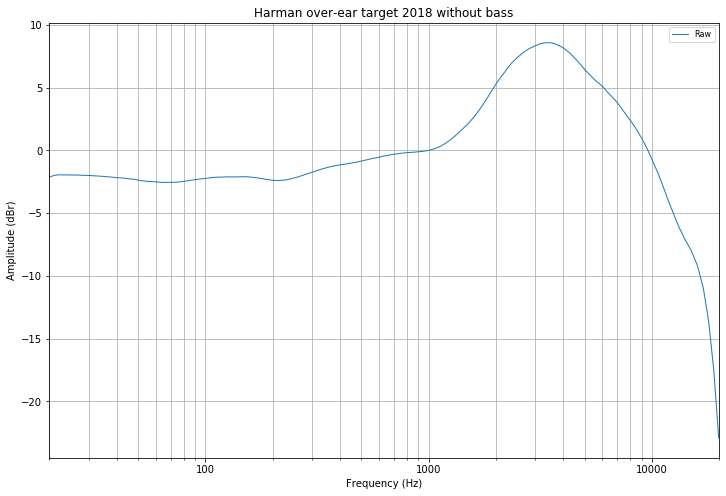

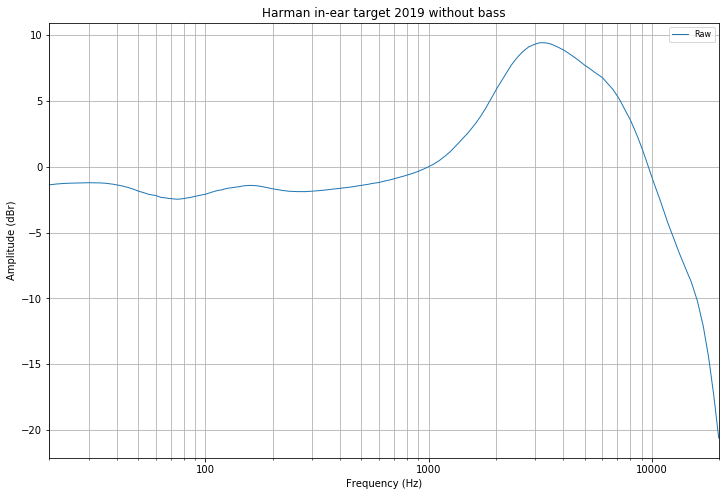

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1bd9c714b48>)

In [77]:
# WARNING: These will overwrite the files
harman_overear_wo_bass.write_to_csv(os.path.join(ROOT_DIR, 'compensation', 'harman_over-ear_2018_wo_bass.csv'))
harman_overear_wo_bass.plot_graph(file_path=os.path.join(ROOT_DIR, 'compensation', 'harman_over-ear_2018_wo_bass.png'), color='C0')
harman_inear_wo_bass.write_to_csv(os.path.join(ROOT_DIR, 'compensation', 'harman_in-ear_2019v2_wo_bass.csv'))
harman_inear_wo_bass.plot_graph(file_path=os.path.join(ROOT_DIR, 'compensation', 'harman_in-ear_2019v2_wo_bass.png'), color='C0')